In [1]:
PACKAGE_FOLDER = '/home/adelsondias/Repos/geohunter'

import sys
sys.path.append(PACKAGE_FOLDER)
import geohunter

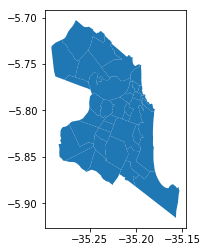

In [5]:
import geopandas as gpd

districts = gpd.read_file('bairros_natal.geojson')
districts.plot()

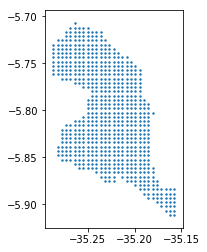

In [11]:
grid = geohunter.features.Grid(0.5).fit(districts)
grid.data.plot(markersize=2)

In [19]:
landmarks = geohunter.features.Landmarks(districts, 
                                         osm_folder='/home/adelsondias/Repos/geohunter/examples/natal/')
landmarks.fit(points={
    'amenity':['hospital', 'place_of_worship', 'police'],
    'leisure':['*'],
    'tourism':['*'],
    'shop':['*'],
    'highway':['bus_stop']
}, lines={
    'highway':['residential', 'primary']
})

In [20]:
X = geohunter.features.KDEFeatures(landmarks, kde_params='auto')\
                        .fit_transform(grid.data)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.ne

In [21]:
X.head()

,kde:amenity_hospital,kde:amenity_place_of_worship,kde:amenity_police,kde:leisure_*,kde:tourism_*,kde:shop_*,kde:highway_bus_stop,kde:highway_residential,kde:highway_primary
place,,,,,,,,,
59,-6.303763,-3.832235,1.445855,-13.376019,-4.270153,-16.261458,-8.355514,-2.531013,-4.122302
60,-7.024628,-4.658292,1.090247,-16.060155,-5.274445,-19.377592,-9.582164,-3.525542,-9.253864
89,-5.108983,-1.779487,2.176265,-7.674736,-1.480051,-9.351844,-5.329635,-0.338205,-2.451834
90,-5.827703,-2.343134,1.868519,-9.824728,-2.037469,-11.966290,-6.197452,-1.140881,-7.119897
91,-6.572695,-3.295657,1.483272,-12.911113,-3.202588,-15.421941,-7.604758,-2.264360,-11.835048


In [22]:
def plot_kde(shape, grid, kde, ax, fig_path=False, geojson_path=False):
    import numpy as np
    import geojsoncontour
    Z = np.zeros(grid.lonv.shape[0]*grid.lonv.shape[1]) - 999
    Z[kde.reset_index()['place'].unique()] = kde.values.ravel()
    Z = Z.reshape(grid.lonv.shape)
    shape.plot(ax=ax, color='white', edgecolor='black')
    contourf = plt.contourf(grid.lonv, grid.latv, Z, levels=np.linspace(-2, 7, 15), alpha=0.6, cmap=plt.cm.Spectral_r)
    plt.axis('off')
    if fig_path:
        plt.savefig(fig_path)
    if geojson_path:
        geojsoncontour.contourf_to_geojson(contourf=contourf, geojson_filepath=geojson_path, fill_opacity=0.5)
    plt.show()
    return

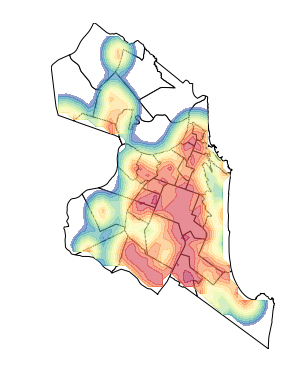

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,6))
plot_kde(districts, grid, X['kde:highway_bus_stop'], ax)